# Titanic Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Identifikasi Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualization

Simple Chart

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

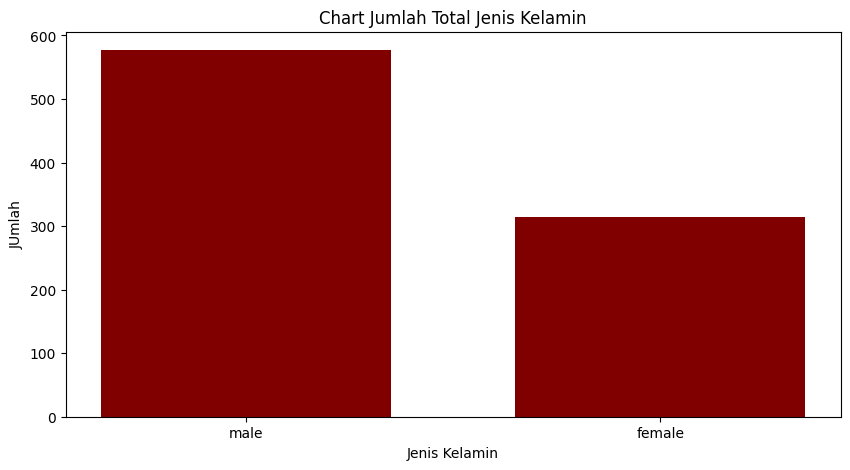

In [8]:
count_sex = train['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values

fig = plt.figure(figsize = (10, 5))
plt.bar(index_sex, value_sex, color = 'maroon', width = 0.7)

plt.title('Chart Jumlah Total Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('JUmlah')

plt.show()

In [9]:
# membuat function untuk chart

def bar_Chart(column):
    count = train[column].value_counts()

    index = count.index
    values = count.values

    fig = plt.figure(figsize = (10,  5))
    plt.bar(index, values , color = "maroon", width = 0.7)

    plt.show()

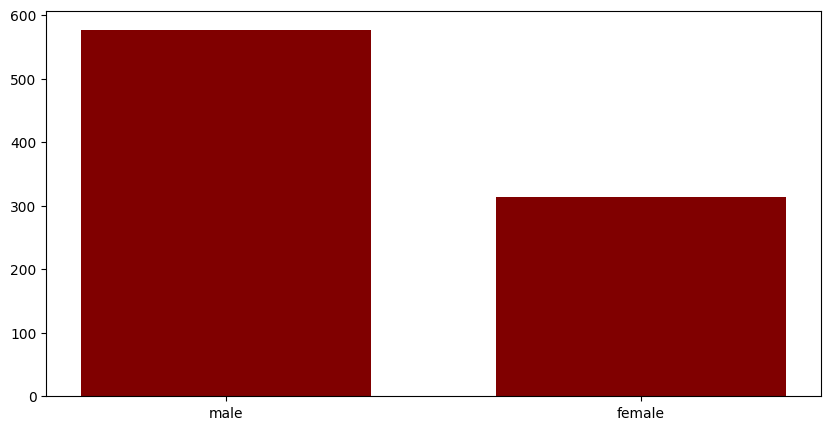

In [10]:
bar_Chart('Sex')

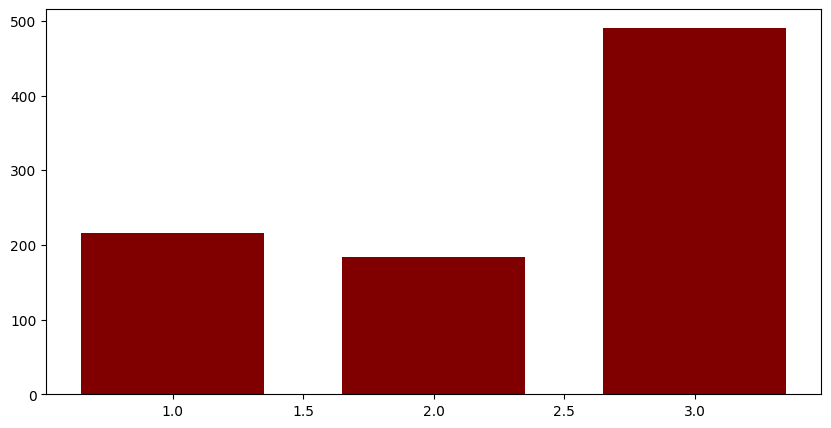

In [11]:
bar_Chart('Pclass')

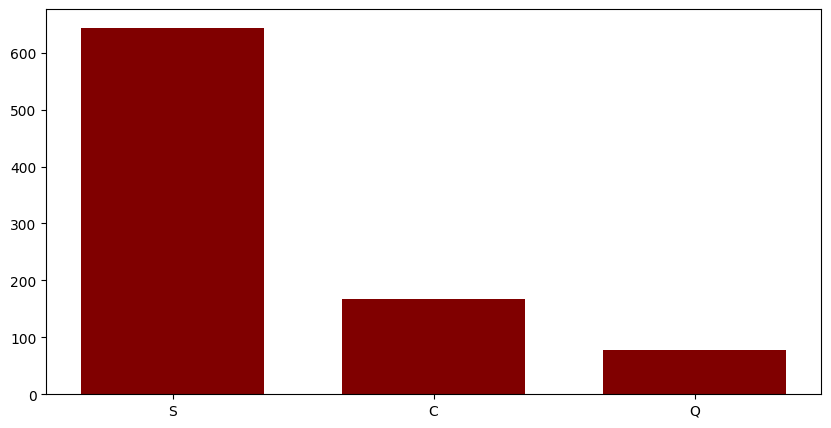

In [12]:
bar_Chart("Embarked")

# Grouped Barchart / Clustered Barchart

In [13]:
survived_sex = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()
survived_sex

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [14]:
def grouped_bar(column):
    survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

    g = sns.catplot(
        data=survived, kind='bar',
        x = 'Survived', y = 'PassengerId', hue=column,
        palette='dark', height=6
    )

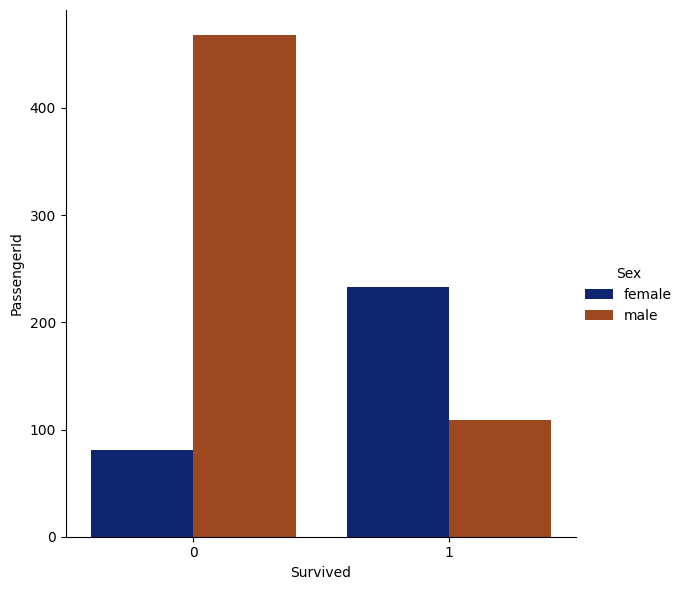

In [15]:
grouped_bar('Sex')

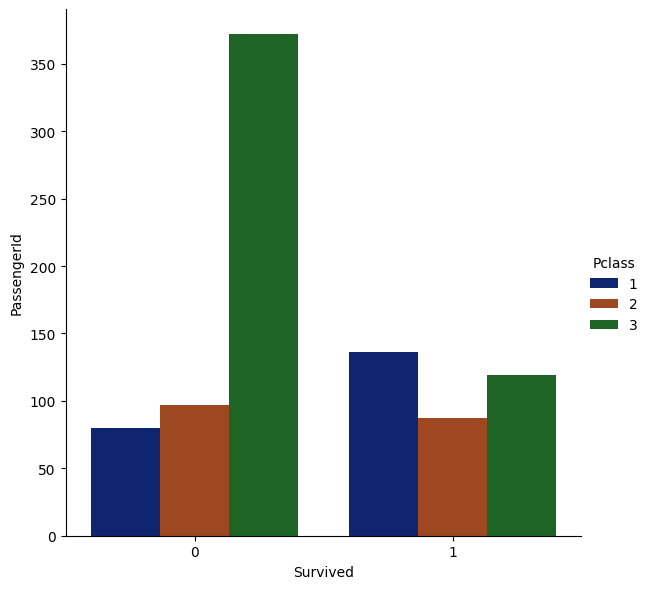

In [16]:
grouped_bar("Pclass")

Histogram

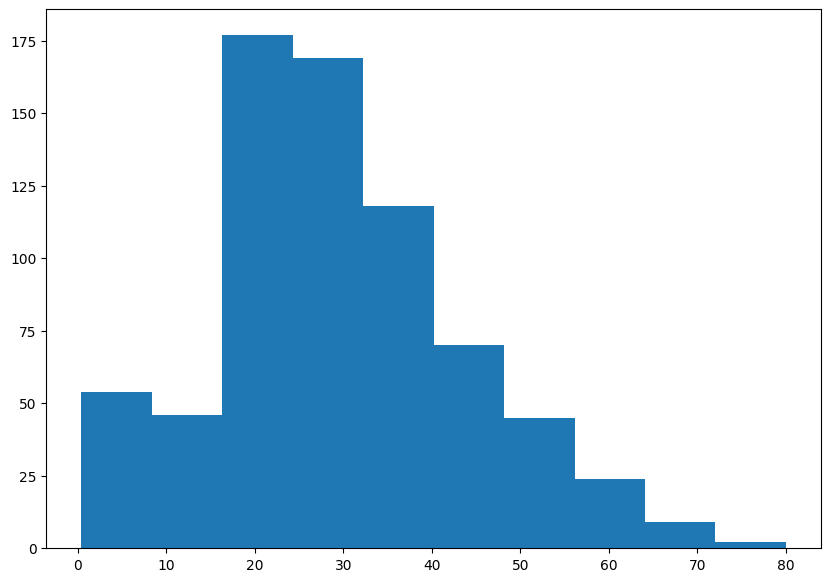

In [17]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(train.Age)
plt.show()

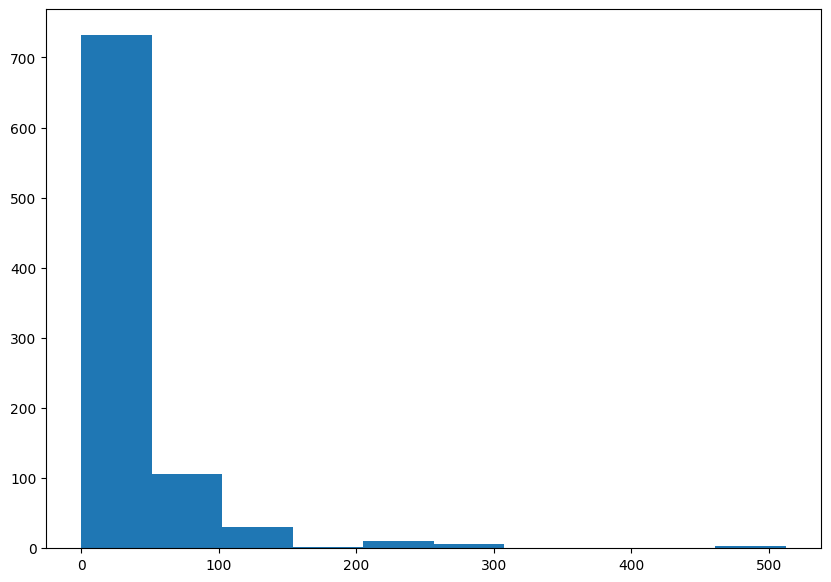

In [18]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

# KDE Plot (Kernel Density Estimate)

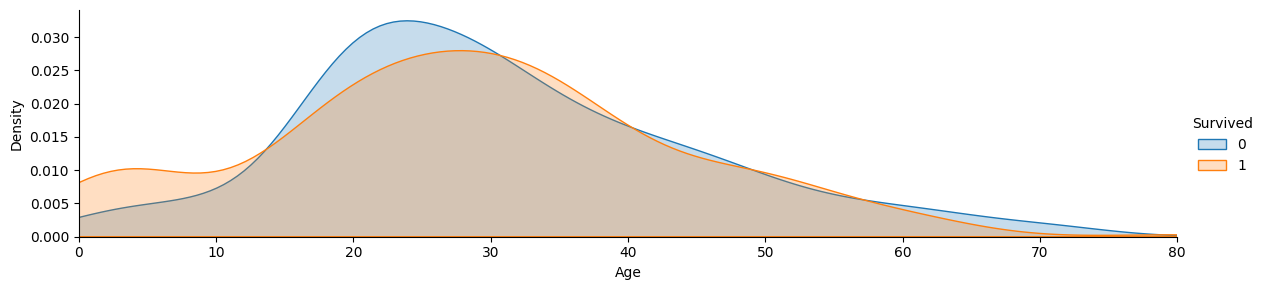

In [19]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

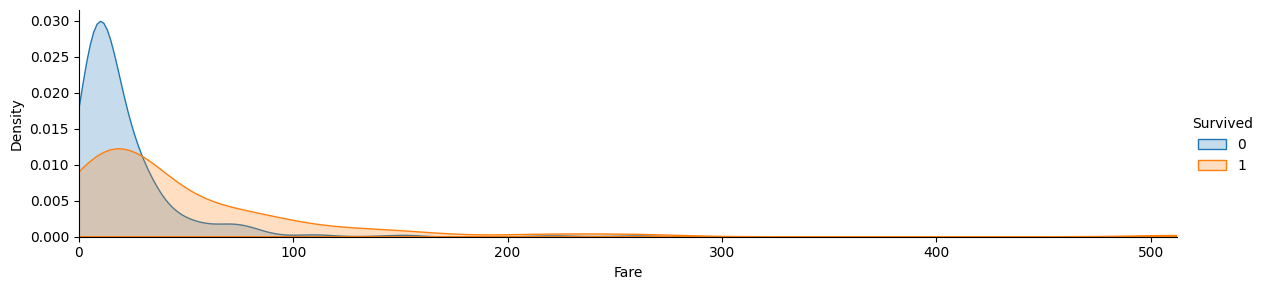

In [20]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

# Preprocessing Data

Mengisi Data Null

In [21]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Value Data Embarked

In [23]:
mode_embarked  = train['Embarked'].mode()[0]
mode_embarked

'S'

In [24]:
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

Missing Value Data Train Age

In [25]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [26]:
train['Age'] = train['Age'].fillna(mean_age)

Missing Value Data Test Age

In [27]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [28]:
test['Age'] = test['Age'].fillna(mean_age_test)

Missing Value Data Fare


In [29]:
mean_fare_test = test['Fare'].mean()

test['Fare'] = test['Fare'].fillna(mean_fare_test)

Drop Data Cabin Karena terlalu banyak Missing Value

In [30]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1 )

In [31]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Convert Data to Numberic

Convert Data Sex

In [33]:
sex_mapping = {'male': 0, 'female': 1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)


Convert Embarked

In [34]:
embarked = train[['Embarked']]

dummies = pd.get_dummies(embarked)

In [35]:
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
train = pd.merge(train.reset_index(),  dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [37]:
train = train.drop(["index",'Embarked'], axis =1 )

In [38]:
embarked_test = test[['Embarked']] 

dummies_test = pd.get_dummies(embarked_test)

test = pd.merge(test.reset_index(),  dummies_test.reset_index())
test = test.drop(['index', 'Embarked'], axis = 1 )
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1


Extract Title from Name

In [39]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [40]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test['Title'] = test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1,2


# Selected Column

In [41]:
train.shape, test.shape

((891, 14), (418, 13))

In [42]:
train = train.drop(["PassengerId",'Name', "Ticket"], axis = 1)
test = test.drop(["PassengerId",'Name' , "Ticket"], axis = 1 )

# Modelling

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [44]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


In [45]:
  # Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


Menggunakan mesin GaussianNB

In [48]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

clf = GaussianNB()
scoring  = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [49]:
score.mean()

0.7991212102190698

Menggunakan Mesin DecisionTreeClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

clf = DecisionTreeClassifier()
grd = GridSearchCV(clf, param_grid, cv=5)
grd.fit(train_data, target)

print(grd.best_params_)
print(grd.best_score_)

c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Ridho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8294080723118448


In [62]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=2)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81564246 0.76966292 0.80898876 0.79213483 0.80337079]


In [63]:
score.mean()

0.7979599522942691

Karena score dari mesin GaussianNB lebih besar, maka kita akan menggunakan itu

# Prediction

In [52]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


In [53]:
# clf = GaussianNB()
# clf.fit(train_data, target)

In [54]:
# prediction = clf.predict(test)

In [55]:
# df_test = pd.read_csv('test.csv')

# submission = pd.DataFrame({
#     'PassengerId' : df_test['PassengerId'],
#     'Survived' : prediction
#     })

# submission.head()

In [56]:
# submission.to_csv('Submit.csv', index=False)

In [57]:
# test['Survived'] = submission['Survived']
# test.head()